In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.discrete.discrete_model import Logit
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

In [10]:
# Load data
mcdonalds = pd.read_csv("/mcDonalds.csv")

In [11]:
# Display column names and dimensions
print(mcdonalds.columns)
print(mcdonalds.shape)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)


In [12]:
# Display first 3 rows
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  


In [13]:
# Preprocess data
md_x = mcdonalds.iloc[:, 0:11]
md_x = (md_x == "Yes").astype(int)
print(np.round(md_x.mean(), 2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [16]:
# Perform PCA
MD_pca = PCA()
MD_pca.fit(md_x)

PCA()

In [18]:
# Summary of PCA
print("Importance of components:")
print(pd.DataFrame({
    "Standard deviation": np.round(MD_pca.explained_variance_, 5)**0.5,
    "Proportion of Variance": np.round(MD_pca.explained_variance_ratio_, 5),
    "Cumulative Proportion": np.round(np.cumsum(MD_pca.explained_variance_ratio_), 5)
}, index=["PC"+str(i+1) for i in range(md_x.shape[1])]))

Importance of components:
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757047                 0.29945                0.29945
PC2             0.607454                 0.19280                0.49224
PC3             0.504619                 0.13305                0.62529
PC4             0.398798                 0.08310                0.70839
PC5             0.337402                 0.05948                0.76787
PC6             0.310274                 0.05030                0.81817
PC7             0.289689                 0.04385                0.86201
PC8             0.275118                 0.03955                0.90156
PC9             0.265255                 0.03676                0.93832
PC10            0.248837                 0.03235                0.97068
PC11            0.236897                 0.02932                1.00000


In [23]:
# Print standard deviations
print("Standard deviations (1, .., p=11):")
print(np.round(pca.singular_values_, 1))

# Print rotation matrix (loadings)
print("Rotation (n x k) = (11 x 11):")
for i in range(len(pca.components_)):
    print("PC" + str(i+1), end=" ")
    for j in range(len(pca.components_[i])):
        print(np.round(pca.components_[i][j], 3), end=" ")
    print()

Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]
Rotation (n x k) = (11 x 11):
PC1 -0.477 -0.155 -0.006 0.116 0.304 -0.108 -0.337 -0.472 0.329 -0.214 0.375 
PC2 0.364 0.016 0.019 -0.034 -0.064 -0.087 -0.611 0.307 0.601 0.077 -0.14 
PC3 -0.304 -0.063 -0.037 -0.322 -0.802 -0.065 -0.149 -0.287 0.024 0.192 -0.089 
PC4 0.055 -0.142 0.198 -0.354 0.254 -0.097 0.119 -0.003 0.068 0.763 0.37 
PC5 -0.308 0.278 0.071 -0.073 0.361 0.108 -0.129 -0.211 -0.003 0.288 -0.729 
PC6 0.171 -0.348 -0.355 -0.407 0.209 -0.595 -0.103 -0.077 -0.261 -0.178 -0.211 
PC7 -0.281 -0.06 0.708 -0.386 0.036 -0.087 -0.04 0.36 -0.068 -0.35 -0.027 
PC8 0.013 -0.113 0.376 0.59 -0.138 -0.628 0.14 -0.073 0.03 0.176 -0.167 
PC9 0.572 -0.018 0.4 -0.161 -0.003 0.166 0.076 -0.639 0.067 -0.186 -0.072 
PC10 -0.11 -0.666 -0.076 -0.005 0.009 0.24 0.428 0.079 0.454 -0.038 -0.29 
PC11 0.045 -0.542 0.142 0.251 0.002 0.339 -0.489 0.02 -0.49 0.158 -0.041 


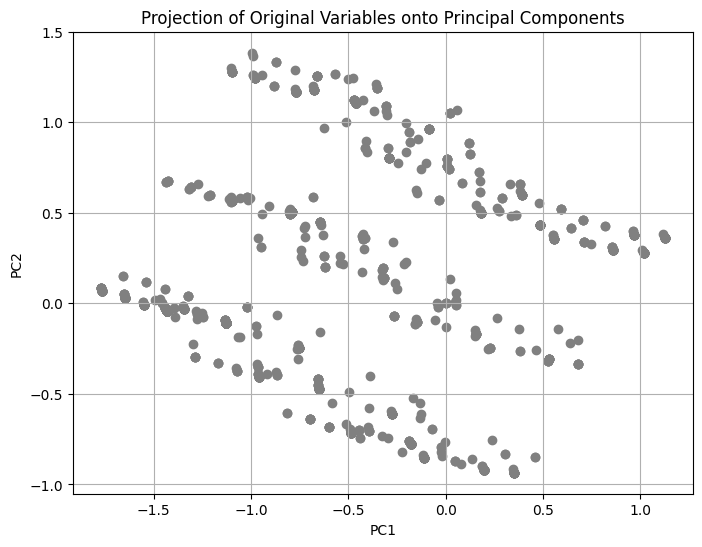

In [25]:
# Calculate the projection of original variables onto principal components
projection = np.dot(md_x, pca.components_.T)

# Plot the projection
plt.figure(figsize=(8, 6))
plt.scatter(projection[:, 0], projection[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Original Variables onto Principal Components')
plt.grid(True)
plt.show()

In [50]:
from sklearn.cluster import KMeans
import numpy as np

# Set seed for reproducibility
np.random.seed(1234)

# Perform KMeans clustering with 2 to 8 clusters
results = {}
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(md_x)
    results[n_clusters] = kmeans

# Select the best clustering solution based on some criterion (e.g., BIC, AIC)
# Here, let's select the solution with the lowest inertia
best_k = min(results, key=lambda k: results[k].inertia_)
best_kmeans = results[best_k]

# Relabel clusters if necessary (optional step)
# In scikit-learn, cluster labels are already integers starting from 0, so no relabeling is needed.

# Access cluster labels
cluster_labels = best_kmeans.labels_


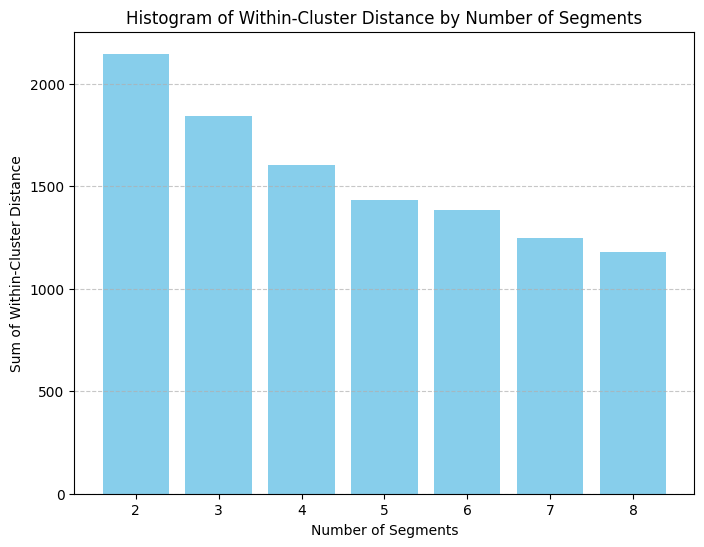

In [51]:
# Collect inertia values for each number of clusters
inertia_values = [results[k].inertia_ for k in range(2, 9)]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(range(2, 9), inertia_values, color='skyblue')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within-Cluster Distance')
plt.title('Histogram of Within-Cluster Distance by Number of Segments')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [52]:
import numpy as np
from sklearn.cluster import KMeans

# Set seed for reproducibility
np.random.seed(1234)

# Initialize variables
n_boot = 100
n_rep = 10
cluster_results = []

# Perform bootstrapped k-means clustering
for k in range(2, 9):
    cluster_means = []
    for _ in range(n_boot):
        # Bootstrap resampling
        indices = np.random.choice(len(md_x), size=len(md_x), replace=True)
        bootstrap_data = md_x.iloc[indices]

        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k, n_init=n_rep)
        kmeans.fit(bootstrap_data)

        # Store cluster means
        cluster_means.append(kmeans.cluster_centers_)

    # Store cluster means for each k
    cluster_results.append(cluster_means)

# Print or use cluster_results as needed
